## Desafio Kaggle: Titanic - Machine Learning from Disaster
#### https://www.kaggle.com/c/titanic/overview

### Imports das bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

color = sns.color_palette()
sns.set_style('darkgrid')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

### Carregamento dos dados

In [2]:
train = pd.read_csv('data/train.csv')
print('Train: {}'.format(train.shape))
test = pd.read_csv('data/test.csv')
print('\nTest: {}'.format(test.shape))

combine = [train, test]

Train: (891, 12)

Test: (418, 11)


### Descrição do conjunto de dados

Esse conjunto contém dados dos passageiros do Titanic. Em 15 de abril de 1912, durante sua viagem inaugural, o RMS Titanic afundou após colidir com um iceberg. Infelizmente, não havia botes salva-vidas suficientes para todos a bordo, resultando na morte de 1502 dos 2224 passageiros e tripulantes.

### Características do conjunto

##### 2 classes
##### 1309 exemplos
##### 12 features

- PassengerId: identificador do passageiro;
- Survived: sobrevivência. 0= não e 1= sim;
- Pclass: classe da passagem. 1= primeira classe, 2= segunda e 3= terceira;
- Name: nome do passageiro;
- Sex: sexo;
- Age: idade;
- SibSp: número de irmãos/cônjuges a bordo;
- Parch: número de pais/filhos a bordo;
- Ticket: número da passagem;
- Fare: valor da tarifa;
- Cabin: número da cabine;
- Embarked: local de embarque. C= Cherbourg, Q= Queenstown, S= Southampton

In [3]:
print('Colunas presentes: {}'.format(train.columns.values))

Colunas presentes: ['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


### Remove a coluna id dos dados

In [5]:
trainPassengerId = train['PassengerId']
train.drop(['PassengerId'], axis=1, inplace=True)

testPassengerId = test['PassengerId']
test.drop(['PassengerId'], axis=1, inplace=True)

### Exploração dos dados

In [6]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Asplund, Miss. Lillian Gertrud",male,347082,G6,S
freq,1,577,7,4,644


### Pré-processamento dos dados

#### Renomeia as colunas

In [8]:
cols = {
    'Survived': 'sobrevivente',
    'Pclass': 'classe',
    'Name': 'nome',
    'Sex': 'sexo',
    'Age': 'idade',
    'SibSp': 'irmaosEconjunges',
    'Parch': 'paisEfilhos',
    'Ticket': 'passagem',
    'Fare': 'tarifa',
    'Cabin': 'cabine',
    'Embarked': 'embarque'
}

train = train.rename(columns=cols)

In [9]:
cols = {
    'Pclass': 'classe',
    'Name': 'nome',
    'Sex': 'sexo',
    'Age': 'idade',
    'SibSp': 'irmaosEconjunges',
    'Parch': 'paisEfilhos',
    'Ticket': 'passagem',
    'Fare': 'tarifa',
    'Cabin': 'cabine',
    'Embarked': 'embarque'
}

test = test.rename(columns=cols)

#### Valores faltantes

In [10]:
print('Valores faltantes treino: \n{}'.format(train.isnull().mean()* 100))

Valores faltantes treino: 
sobrevivente         0.000000
classe               0.000000
nome                 0.000000
sexo                 0.000000
idade               19.865320
irmaosEconjunges     0.000000
paisEfilhos          0.000000
passagem             0.000000
tarifa               0.000000
cabine              77.104377
embarque             0.224467
dtype: float64


In [11]:
print('Valores faltantes teste: \n{}'.format(test.isnull().mean()* 100))

Valores faltantes teste: 
classe               0.000000
nome                 0.000000
sexo                 0.000000
idade               20.574163
irmaosEconjunges     0.000000
paisEfilhos          0.000000
passagem             0.000000
tarifa               0.239234
cabine              78.229665
embarque             0.000000
dtype: float64


#### Tratando os dados nulos

In [12]:
train.drop(['cabine'], axis=1, inplace=True)
test.drop(['cabine'], axis=1, inplace=True)

In [13]:
cols = ['idade', 'tarifa']

for c in cols:
    train[c] = train[c].fillna(train[c].mean())
    test[c] = test[c].fillna(test[c].mean())

In [14]:
cols = ['sobrevivente', 'embarque']

for c in cols:
    train[c] = train[c].fillna(train[c].mode()[0])
    
test['embarque'] = test['embarque'].fillna(test['embarque'].mode()[0])

#### Valores duplicados

In [15]:
print('Valores duplicados treino: {}'.format(train.duplicated().mean()*100))
print('Valores duplicados teste: {}'.format(test.duplicated().mean()*100))

Valores duplicados treino: 0.0
Valores duplicados teste: 0.0


#### Conversão de valores

In [16]:
cols = ['idade', 'sobrevivente']

for c in cols:
    train[c] = train[c].astype(int)
    
test['idade'] = test['idade'].astype(int)

#### Engenharia de recursos

In [17]:
classe = train[['classe', 'sobrevivente']].groupby(['classe'], as_index=False).mean().sort_values(by='sobrevivente', 
                                                                                               ascending=False)
print('Impacto da Classe no conjunto de dados:\n')
print(classe)

Impacto da Classe no conjunto de dados:

   classe  sobrevivente
0       1      0.629630
1       2      0.472826
2       3      0.242363


Text(0.5, 1.0, 'Média de sobreviventes por classe')

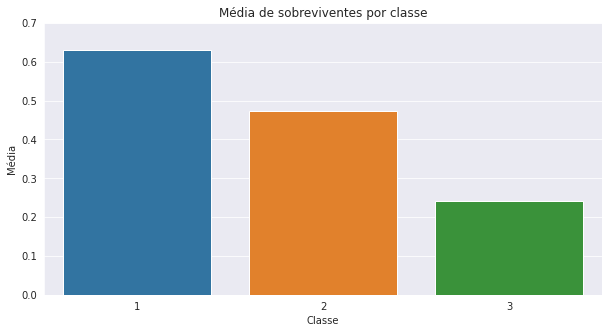

In [18]:
f, ax= plt.subplots(figsize=(10, 5))
sns.barplot(x=classe['classe'], y=classe['sobrevivente'])

plt.ylim(0, 0.70)
plt.xlabel('Classe')
plt.ylabel('Média')
plt.title('Média de sobreviventes por classe')

In [19]:
sexo = train[['sexo', 'sobrevivente']].groupby(['sexo'], as_index=False).mean().sort_values(by='sobrevivente', ascending=False)
print('Impacto do sexo no conjunto de dados:\n')
print(sexo)

Impacto do sexo no conjunto de dados:

     sexo  sobrevivente
0  female      0.742038
1    male      0.188908


Text(0.5, 1.0, 'Média de sobreviventes por sexo')

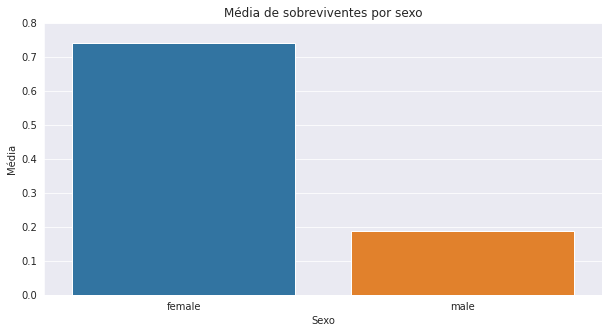

In [20]:
f, ax= plt.subplots(figsize=(10, 5))
sns.barplot(x=sexo['sexo'], y=sexo['sobrevivente'])

plt.ylim(0, 0.80)
plt.xlabel('Sexo')
plt.ylabel('Média')
plt.title('Média de sobreviventes por sexo')

In [21]:
train['tamanhoFamilia'] = train['paisEfilhos'] + train['irmaosEconjunges'] + 1
test['tamanhoFamilia'] = test['paisEfilhos'] + test['irmaosEconjunges'] + 1

tamanhoFamilia = train[['tamanhoFamilia', 'sobrevivente']].groupby(['tamanhoFamilia'], 
                                                                as_index=False).mean().sort_values(by='sobrevivente', 
                                                                                                   ascending=False)
print('Impacto do tamanho da família no conjunto de dados:\n')
print(tamanhoFamilia)

Impacto do tamanho da família no conjunto de dados:

   tamanhoFamilia  sobrevivente
3               4      0.724138
2               3      0.578431
1               2      0.552795
6               7      0.333333
0               1      0.303538
4               5      0.200000
5               6      0.136364
7               8      0.000000
8              11      0.000000


Text(0.5, 1.0, 'Média de sobreviventes por tamanho da família')

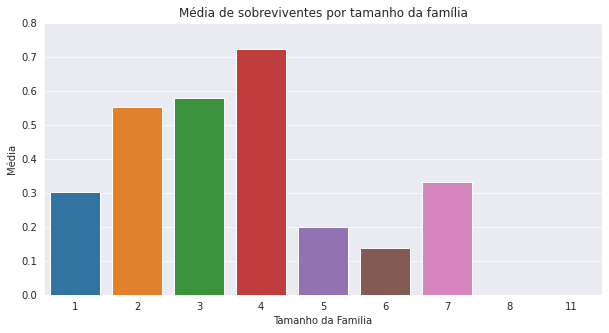

In [22]:
f, ax= plt.subplots(figsize=(10, 5))
sns.barplot(x=tamanhoFamilia['tamanhoFamilia'], y=tamanhoFamilia['sobrevivente'])

plt.ylim(0, 0.80)
plt.xlabel('Tamanho da Familia')
plt.ylabel('Média')
plt.title('Média de sobreviventes por tamanho da família')

In [23]:
embarque = train[['embarque', 'sobrevivente']].groupby(['embarque'], as_index=False).mean().sort_values(by='sobrevivente', 
                                                                                                     ascending=False)
print('Impacto do local de embarque no conjunto de dados:\n')
print(embarque)

Impacto do local de embarque no conjunto de dados:

  embarque  sobrevivente
0        C      0.553571
1        Q      0.389610
2        S      0.339009


Text(0.5, 1.0, 'Média de sobreviventes por local de embarque')

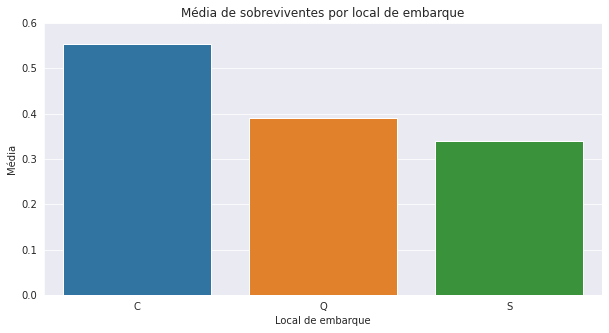

In [24]:
f, ax= plt.subplots(figsize=(10, 5))
sns.barplot(x=embarque['embarque'], y=embarque['sobrevivente'])

plt.ylim(0, 0.60)
plt.xlabel('Local de embarque')
plt.ylabel('Média')
plt.title('Média de sobreviventes por local de embarque')

In [25]:
train['faixaIdade'] = pd.cut(train['idade'], 5)
test['faixaIdade'] =  pd.cut(test['idade'], 5)

faixaIdade = train[['faixaIdade', 'sobrevivente']].groupby(['faixaIdade'], as_index=False).mean().sort_values(by='sobrevivente', 
                                                                                                           ascending=False)
print('Impacto da idade no conjunto de dados:\n')
print(faixaIdade)

Impacto da idade no conjunto de dados:

      faixaIdade  sobrevivente
0  (-0.08, 16.0]      0.550000
3   (48.0, 64.0]      0.434783
2   (32.0, 48.0]      0.403226
1   (16.0, 32.0]      0.344762
4   (64.0, 80.0]      0.090909


Text(0.5, 1.0, 'Média de sobreviventes por faixa de idade')

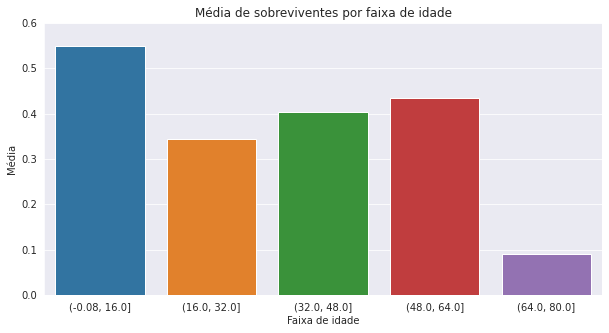

In [26]:
f, ax= plt.subplots(figsize=(10, 5))
sns.barplot(x=faixaIdade['faixaIdade'], y=faixaIdade['sobrevivente'])

plt.ylim(0, 0.60)
plt.xlabel('Faixa de idade')
plt.ylabel('Média')
plt.title('Média de sobreviventes por faixa de idade')

In [27]:
train['estaSozinho'] = 0
train.loc[train['tamanhoFamilia'] == 1, 'estaSozinho'] = 1

test['estaSozinho'] = 0
test.loc[test['tamanhoFamilia'] == 1, 'estaSozinho'] = 1

In [28]:
train['idade*classe'] = train['idade'] * train['classe']
test['idade*classe'] = test['idade'] * test['classe']

### Visualização dos dados

In [29]:
train.head()

,sobrevivente,classe,nome,sexo,idade,irmaosEconjunges,paisEfilhos,passagem,tarifa,embarque,tamanhoFamilia,faixaIdade,estaSozinho,idade*classe
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,2,"(16.0, 32.0]",0,66
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,2,"(32.0, 48.0]",0,38
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,1,"(16.0, 32.0]",1,78
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,2,"(32.0, 48.0]",0,35
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,1,"(32.0, 48.0]",1,105


#### Sobrevivente por idade

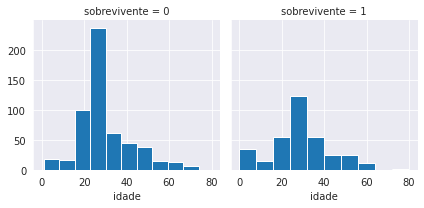

In [30]:
g = sns.FacetGrid(train, col='sobrevivente')
g.map(plt.hist, 'idade', bins=10)

#### Sobrevivente por classe

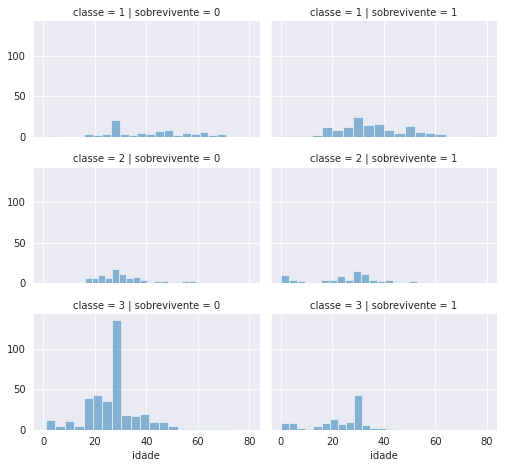

In [31]:
grid = sns.FacetGrid(train, col='sobrevivente', row='classe', size=2.2, aspect=1.6)
grid.map(plt.hist, 'idade', alpha=.5, bins=20)
grid.add_legend()

#### Correlacionando Recursos Categóricos

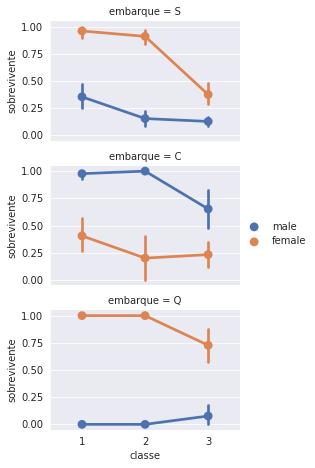

In [32]:
grid = sns.FacetGrid(train, row='embarque', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'classe', 'sobrevivente', 'sexo', palette='deep')
grid.add_legend()

#### Correlacionando Recursos Categóricos e Numéricos

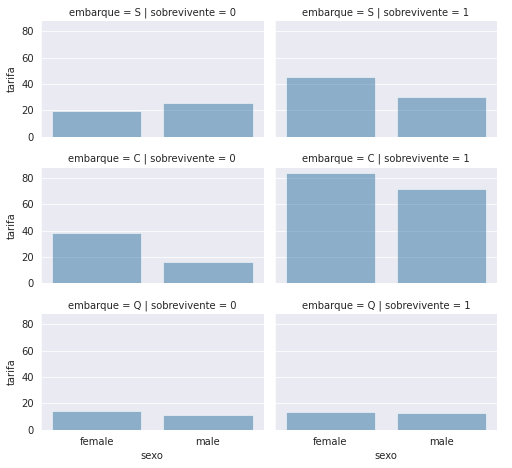

In [33]:
grid = sns.FacetGrid(train, row='embarque', col='sobrevivente', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'sexo', 'tarifa', alpha=.5, ci=None)
grid.add_legend()

#### Concatena os dados

In [34]:
nTrain = train.shape[0]
nTest  = test.shape[0]

In [35]:
y = train.sobrevivente.values
train.drop(['sobrevivente'], axis=1, inplace=True)

In [36]:
df = pd.concat((train, test)).reset_index(drop=True)
print('Dataset shape: {} '.format(df.shape))

Dataset shape: (1309, 13) 


#### Limpeza dos dados

In [37]:
df['sexo'] = df['sexo'].map({'female': 0, 'male': 1}).astype(int)

In [38]:
df['embarque'] = df['embarque'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [39]:
df.loc[df['idade'] <= 16, 'idade'] = 0
df.loc[df['idade'] <= 32, 'idade'] = 1
df.loc[df['idade'] <= 48, 'idade'] = 2
df.loc[df['idade'] <= 64, 'idade'] = 3
df.loc[df['idade'] > 64,  'idade'] = 4

#### Seleção de recursos

In [40]:
df.drop(['nome', 'tarifa', 'passagem', 'faixaIdade'], axis=1, inplace=True)

In [41]:
df.head()

,classe,sexo,idade,irmaosEconjunges,paisEfilhos,embarque,tamanhoFamilia,estaSozinho,idade*classe
0,3,1,3,1,0,0,2,0,66
1,1,0,3,1,0,1,2,0,38
2,3,0,3,0,0,0,1,1,78
3,1,0,3,1,0,0,2,0,35
4,3,1,3,0,0,0,1,1,105


### Correlação de Pearson

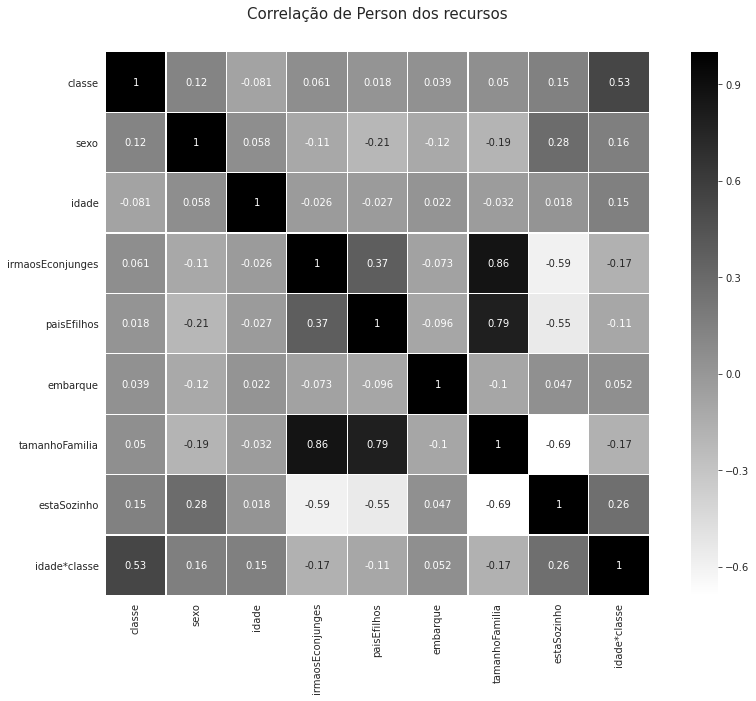

In [42]:
plt.figure(figsize=(15, 10))
plt.title('Correlação de Person dos recursos', y=1.05, size=15)
sns.heatmap(df.corr(), linewidths=0.1, vmax=1.0, square=True, cmap=plt.cm.gist_yarg, linecolor='white', annot=True)

### Modelagem

#### Separação dos dados

In [48]:
X_train = df[:nTrain]
print('Shape X_train: {}'.format(X_train.shape))
X_test = df[:nTest]
print('Shape X_test: {}'.format(X_test.shape))
y_train = y
print('Shape y_train: {}'.format(y_train.shape))

Shape X_train: (891, 9)
Shape X_test: (418, 9)
Shape y_train: (891,)


#### Regressão

In [49]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

80.25

#### SVC

In [51]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
acc_svc

68.35

#### KNN

In [52]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

86.53

#### Naive Bayes

In [53]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

75.76

#### Perceptron

In [54]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron

53.54

#### Linear SVC

In [55]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc

76.77

#### SGD

In [56]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd

72.62

#### Decision Tree

In [57]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree

93.38

#### Random Forest

In [58]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest

93.38

### Avaliação do modelo

In [59]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})

models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,93.38
8,Decision Tree,93.38
1,KNN,86.53
2,Logistic Regression,80.25
7,Linear SVC,76.77
4,Naive Bayes,75.76
6,Stochastic Gradient Decent,72.62
0,Support Vector Machines,68.35
5,Perceptron,53.54


#### Submissão

In [61]:
submission = pd.DataFrame({
        "PassengerId": testPassengerId,
        "Survived": y_pred
    })

submission.to_csv('submission.csv', index=False)